In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Linear Regression

In [350]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [351]:
#Import dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/Regression_Classification_projects/Data_regression.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [352]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [353]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [354]:
#Training the Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [355]:
#Predicting the test set results
y_pred = regressor.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[431.43 431.23]
 [458.58 460.01]
 [462.77 461.14]
 ...
 [473.75 468.9 ]
 [475.44 473.9 ]
 [442.02 437.07]]


In [356]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9323789104734466


Polynomial Regression

In [366]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [367]:
#Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/Regression_Classification_projects/Data_regression.csv')
x = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values

In [368]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)
#Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)


LinearRegression()

In [369]:
#Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

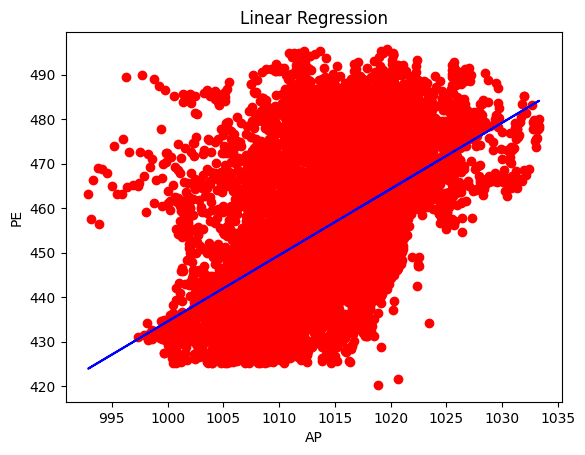

In [370]:
#Visualising the Linear Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

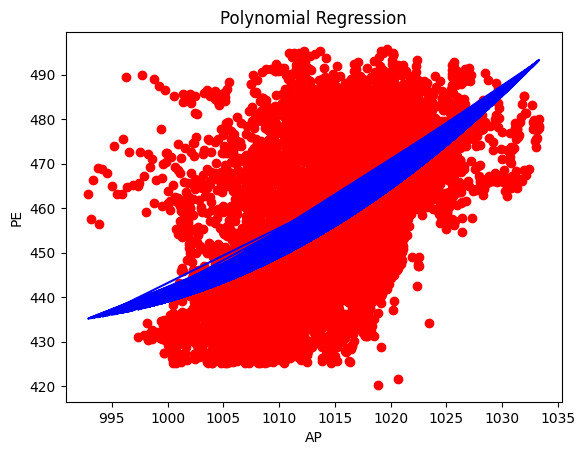

In [371]:
#Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [372]:
#Predicting a new result with Linear Regression
lin_reg.predict([[60.5]])

array([-965.05])

In [373]:
#Prediciting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[60.5]]))

array([23634.27])

In [374]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_train))

-1.002375500603577


SVR

In [375]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [376]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/Regression_Classification_projects/Data_regression.csv')
x = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [377]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 0)
#Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [378]:
#Predicting new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[60.5]])).reshape(-1, 1))

array([[460.65]])

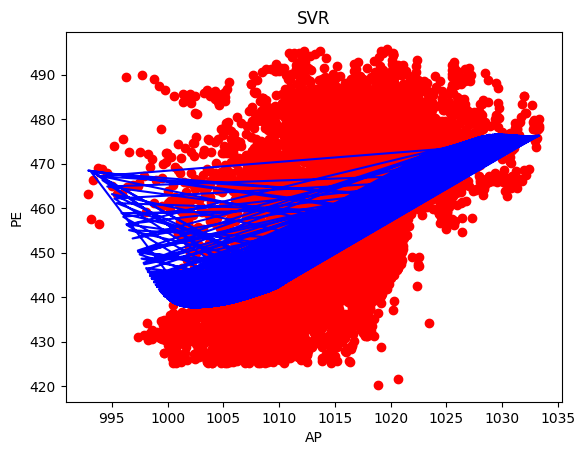

In [379]:
#Visualising SVR results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

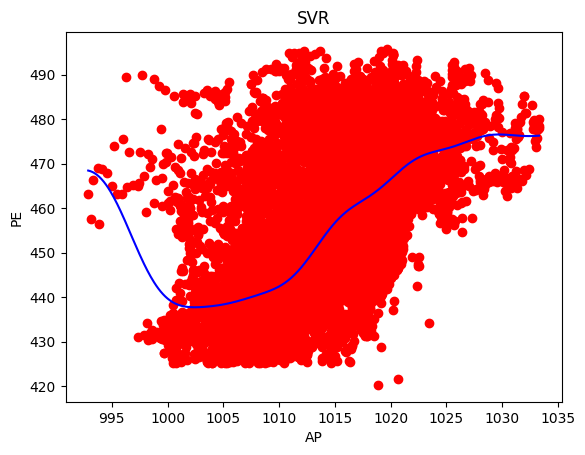

In [380]:
#Visualising SVR results for higher resolution and smoother curve
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('SVR')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [381]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_train))

-1.0023755006035766


Decision Tree Regression

In [382]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [383]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/Regression_Classification_projects/Data_regression.csv')
x = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values

In [384]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 5)
#Training the Decision Tree Regression model on the whole dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [385]:
#Predicting a new result
y_pred = regressor.predict([[60.5]])
print("Predicted PE: %d\n"% y_pred)

Predicted PE: 457



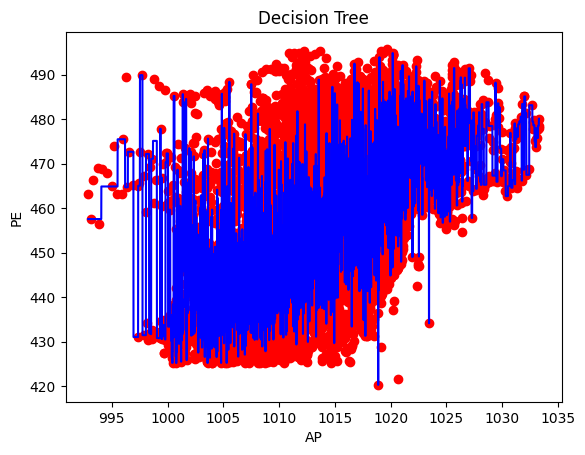

In [386]:
#Visualising the Decision Tree Regression results
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Decision Tree')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [387]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_train))

-1.0280231113679044


Random Forest Regression

In [388]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [389]:
#Importing dataset
dataset = pd.read_csv('/content/drive/My Drive/CSUF/CPSC 483/Regression_Classification_projects/Data_regression.csv')
x = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values

In [390]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 2)

#Training Random Forest Regression model on the whole dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [391]:
#Predicting new result
y_pred = regressor.predict(np.array([60.5]).reshape(1,1))
print("Predicted PE: %d\n"% y_pred)

Predicted PE: 461



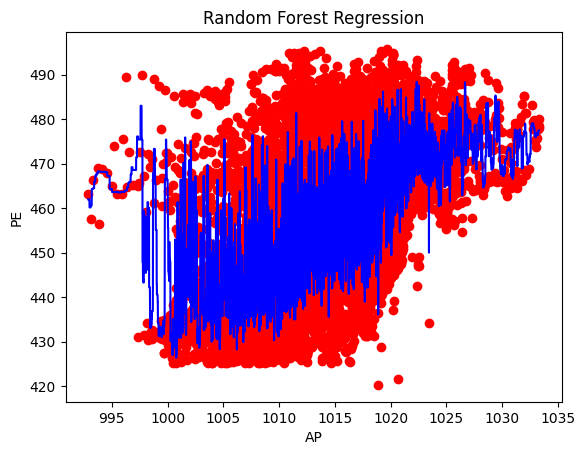

In [392]:
#Visualising Random Forest Regression results
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Random Forest Regression')
plt.xlabel('AP')
plt.ylabel('PE')
plt.show()

In [393]:
#R2 score
from sklearn.metrics import r2_score
print(r2_score(y_test, y_train))

-1.0187933319387055
